In [37]:
#Social_Network_Ads.csv

**Importing the libraries**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score,confusion_matrix,f1_score,accuracy_score
from sklearn.tree import export_graphviz,plot_tree
import pydot

**Importing the dataset**

In [39]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [40]:
#df=df.drop(columns='User ID')
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [41]:
X=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**Feature Scaling**

In [42]:
scalar=StandardScaler()
scalar.fit(X_train)
X_train=scalar.transform(X_train)
X_test=scalar.transform(X_test)

**Fitting Random Forest to the Training set**

In [43]:
rfc=RandomForestClassifier(n_estimators=100,max_depth=1,max_features='sqrt')
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=1, max_features='sqrt')

**Predicting the Test set results**

In [44]:
y_pred=rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [45]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result

,Actual,Predicted
364,1,0
311,1,0
308,1,0
29,0,0
181,0,0
...,...,...
328,1,0
176,0,0
71,0,0
338,0,0


In [46]:
roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])

0.892

In [47]:
accuracy_score(y_test,y_pred)

0.725

**Making the Confusion Matrix**

In [48]:
confusion_matrix(y_test,y_pred)

array([[50,  0],
       [22,  8]])

**Visualising the Training set results**

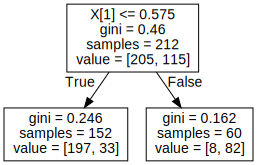

In [78]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(rfc.estimators_[10])

graph = graphviz.Source(dot_data, format='png')
graph